## 1.- Import modules 

In [117]:
import numpy as np
import pandas as pd
import re

# graphics
import seaborn as sns  
import matplotlib.pyplot as plt 
 
import time 

# transform a given text into a vector based on each word
from sklearn.feature_extraction.text import CountVectorizer

# models and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # RandomForest
from sklearn.pipeline import make_pipeline
from sklearn import linear_model # linear relationship between the input variables and the output variable

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Model
from xgboost import XGBClassifier

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline

## 2.- Read data

### 2.1 From google **drive**

In [118]:
dff = pd.read_csv("/content/drive/MyDrive/phishing_site_urls.csv")
dff.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


### 2.2 Create my dataset


In [119]:
# initialize list of lists

data = [['tryhackme.com', 'good'],['hackthebox.com', 'good'],['navajanegra.com/', 'good']]
  
# Create the pandas DataFrame
dfm = pd.DataFrame(data, columns=['URL', 'Label'])
  
# print dataframe.
dfm

,URL,Label
0,honeycon.es,good
1,honeycon.eu,good
2,honeycon.,good
3,honeycon.eu/index.html,good
4,ciberseg.uah.es,good
5,www.morteruelo.net/,good
6,morteruelo.net,good
7,www.navajanegra.com/,good
8,navajanegra.com/,good


### 2.3 From a csv in a url

In [120]:
dfth = pd.read_csv('http://data.phishtank.com/data/online-valid.csv')

In [121]:

lista=[]
def remove_tags(string):
    result = string.replace("https://", "").replace("http://", "")
    lista.append(result)
    return result
  
lst = dfth['url'].apply(lambda cw : remove_tags(cw))
dx = pd.DataFrame (lista, columns = ['URL'])
dx['Label']="bad" # add column

In [122]:
dx.shape

(24136, 2)

In [123]:
dx.sample(10)

,URL,Label
4053,vetrina.notarify.io/wp-content/webmailbeta.aru...,bad
11086,attdomainyetservice.weeblysite.com/,bad
4555,gcneurotherapy.com/ww.tuya.com.co/init.html,bad
4212,voicemail-cnmwireless-net.web.app/,bad
22390,docs.google.com/forms/d/e/1FAIpQLSf0aPPDcwB17-...,bad
23441,server-networksolutions.web.app/#adsf@adsf.com,bad
21570,www.alidaled.com.cn/function/uploadfile/202201...,bad
9071,mythwallet.com/acess/,bad
18291,hbrilhobrazzz.blogspot.com,bad
6065,account-appeal-form-10032654.web.app/,bad


In [124]:
dfth['Label']="bad" # add column
dfth['URL'] = dfth['url'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
#dfth['url'] = dfth['url'].replace(r'http\S+', '', regex=True) # remove http
dfhh= dfth.drop(columns=["phish_detail_url","phish_id",'submission_time','target'])  # remove columns
dfhh.sample(10)

,url,verified,verification_time,online,Label,URL
10841,https://xeremebremere-dbea7.web.app/,yes,2023-01-25T00:07:09+00:00,yes,bad,
5600,https://vidici.ba/long/O%20V%206/#accounts@cen...,yes,2023-02-05T19:42:37+00:00,yes,bad,
2757,https://dev-proamericas-cr.pantheonsite.io/,yes,2023-02-09T15:21:55+00:00,yes,bad,
288,https://zsax-rr77.web.app/,yes,2023-02-15T03:42:28+00:00,yes,bad,
22203,https://4bx28w.csb.app/webmail.htm/#info@vsvsm...,yes,2022-07-19T03:13:06+00:00,yes,bad,
17549,https://3rterg.1fgtaaxs9y.workers.dev/,yes,2022-12-29T22:21:51+00:00,yes,bad,
11259,https://xn--ofertasrelmpagoamericanas-ddc.com/...,yes,2023-02-13T09:12:28+00:00,yes,bad,
14860,http://swap-protocol.com,yes,2023-01-16T18:11:55+00:00,yes,bad,
8116,https://www.gettestosteroneonline.com/jp,yes,2023-01-31T03:04:38+00:00,yes,bad,
1246,https://85g0-j93r--w9gbv083wge0b-v3h50-g80-8fh...,yes,2023-02-13T19:32:38+00:00,yes,bad,


In [125]:
dfn = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202201.csv')
dfn1 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202202.csv')
dfn2 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2021/202112.csv')
dfn3 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2021/202111.csv')
dfn3 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2021/202110.csv')
dfn4 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202203.csv')
dfn5 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202204.csv')
dfn6 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202205.csv')
dfn7 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202206.csv')
dfn8 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202207.csv')
dfn9 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202208.csv')
dfn10 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202209.csv')
dfn11 = pd.read_csv('https://raw.githubusercontent.com/JPCERTCC/phishurl-list/main/2022/202210.csv')

#concatenate the datasets
dfh=pd.concat([dfn, dfn1, dfn2,dfn3,dfn4,dfn5,dfn6,dfn7,dfn8,dfn9,dfn10])

## 3.- Data cleansing and normalization

In [126]:
dfh['Label']="bad" # add column
dfh['URL'] = dff['URL'].replace(r'http\S+', '', regex=True) # remove http
dfa = dfh.drop(columns=["date","description"])  # remove columns
dfa.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


### 3.1 concatenate the datasets

In [127]:
df=pd.concat([dff, dfm, dfa, dx], ignore_index=True)

## 4.- Exploratory Data Analysis (EDA)

### 4.1 Detect null

In [128]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

### 4.2 Dimensionality of dataset

In [129]:
df.shape

(631813, 2)

### 4.3 Description of dataset

In [130]:
df.describe()

,URL,Label
count,631813,631813
unique,531106,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392933


### 4.4 Distribution of Classes

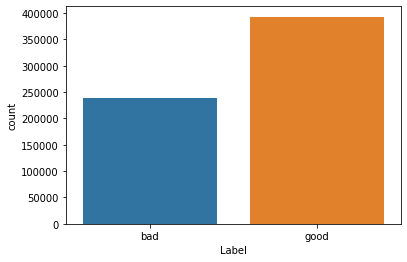

In [131]:
sns.countplot(x='Label', data=df)

## 5.- Create model

### 5.1 Train Test Split

In [132]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.URL, df.Label,test_size=0.3, random_state=5)

### 5.2 model

In [133]:
print('model ...')

#Decomments and comments to choose a model

# Pipelines are implemented as objects that are applied to data in a particular order. Each step of the pipeline is a transformation, 
# which can be a function or an object with a "fit" and "transform" method. The output of one transformation is passed as input to the next.

# Operations with NLTK Tokenizer
# 

#Definition model
#pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression(max_iter=507197))
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), linear_model.LogisticRegression(
   random_state = 0,solver = 'liblinear'))

# Generate model
pipeline_ls.fit(Xtrain,Ytrain)

model ...


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

## 6. Results

### 6.1 Metrics

#### 6.1.1 Acuracy

In [134]:
# Acuracy on test data

# it is defined as the proportion of correct predictions over the total number of predictions made
pred_test = pipeline_ls.predict(Xtest)
accuracy_test = accuracy_score(pred_test, Ytest)
print('Accuracy on test data : ', accuracy_test)

Accuracy on test data :  0.9670261258599586


#### 6.1.2 Matrix

In [135]:
# Matrix
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(Xtest), Ytest),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

CONFUSION MATRIX


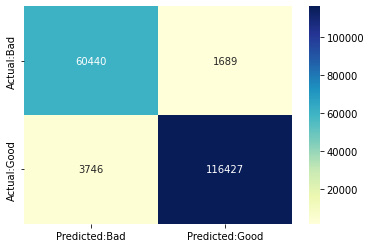

In [30]:
print('CONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

#### 6.1.3 Classification Report

In [136]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(Xtest), Ytest,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.97      0.96     69352
        Good       0.98      0.96      0.97    120192

    accuracy                           0.97    189544
   macro avg       0.96      0.97      0.96    189544
weighted avg       0.97      0.97      0.97    189544




1.   **Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.
2.   **Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
3.   **Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.
4.   **Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.





## 7.- Save model

In [137]:
# Import pickle Package

import pickle

Pkl_Filename = "/content/drive/MyDrive/Pickle_type_Model_LM.pkl" 

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(pipeline_ls, file)